# Regression techniques in house prices prediction

The main goal of this project is to show usage of different machine learning techniques in regression where the dependent variable is house sale prices in Seattle in the first half of the 2015. The dataset comes from https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/. It contains data about home sales in King County in 2014-15. Project is divided in to two parts. Firstly, the data for Seattle was selected, described, visualized and verified for occurence of incorrect values. After it, the feature selection methods were applied. These steps properly prepared dataset which was used in the second part of this project, where selected variables were used to create a dataset for regression. Before implementing various types of regression methods, the dataset was divided into train and test sample. To predict house prices, the following regression techniques were selected:
- Linear Regression
- Lasso
- Ridge
- Decision Tree
- Random Forest

For each of them the k-fold cross validation was used. In order to select the best model metrics like R2, neg_root_mean_squared_error, neg_mean_absolute_error were used. Based on these results, the best techniques are Random Forest, Linear Regression and Rigde Regression.

## Data preparation 

In every project based on data, crucial part is exploratory data analysis. To use appropriate techniques and acquire meaningful results, the scientist has to be aware what is inside the dataset. Furthermore, the data has to be cleaned and properly prepared to analyzed problem, because model with incorrect data has incorrect results what makes it useless. In this part of project, emphasis was placed on preparing the data to further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

Data description:
- id - Identification
- date - Date sold
- price - Sale price
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_liv - Size of living area in square feet
- sqft_lot - Size of the lot in square feet
- floors - Number of floors
- waterfront - ‘1’ if the property has a waterfront, ‘0’ if not.
- view - An index from 0 to 4 of how good the view of the property was
- condition - Condition of the house, ranked from 1 to 5
- grade - Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty
- sqft_above - Square feet above ground
- sqft_basmt - Square feet below ground
- yr_built - Year built
- yr_renov - Year renovated. ‘0’ if never renovated
- zipcode - 5 digit zip code
- lat - Latitude
- long - Longitude
- squft_liv15 - Average size of interior housing living space for the closest 15 houses, in square feet
- squft_lot15 - Average size of land lots for the closest 15 houses, in square feet



In [2]:
pd.set_option('display.max_columns', 100)

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Before performing the actions, it is always useful to print the data and check the columns types. In this case zip_codes will be used to choose data only for Seattle and Date will be used to take data only for 2015, but Date column format is not adequate for further steps and it should be changed. Zip codes comes from https://www.usmapguide.com/washington/seattle-zip-code-map/

In [4]:
zip_codes = [98101,98102,98103,98104,98105,98106,98107,98108,98109,98111,98112,98113,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98127,98129,98131,98133,98134,98136,98138,98139,98141,98144,98145,98146,98148,98154,98155,98158,98160,98161,98164,98165,98166,98168,98170,98174,98175,98177,98178,98181,98185,98188,98190,98191,98194,98195,98198,98199]

In [5]:
df1 = df[df.iloc[:, :].isin(zip_codes).any(axis=1)]
df1.reset_index(drop=True, inplace=True)
df1.loc[:,'date']=df1['date'].astype(str).str[:8]
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
4,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
8973,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
8974,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
8975,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [6]:
df1 = df1[df1['date'].dt.year==2015]
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
4,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
6,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
7,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
20,9215400105,2015-04-28,450000.0,3,1.75,1250,5963,1.0,0,0,4,7,1250,0,1953,0,98115,47.6796,-122.301,970,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,5100403806,2015-04-07,467000.0,3,2.50,1425,1179,3.0,0,0,3,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
8970,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
8971,7936000429,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
8972,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265


The dataset includes information not only for Seattle but for every city in King County. In order to choose data for Seattle, the Seattle zip_codes were prepared to use it as a key to choose properly rows. The 'date' column was transformed into more useful form. After that, the data only for 2015 was selected.

Before implementing data into model, it is necessary to be aware what is inside the dataset. Thus the steps to known the data were taken. Firstly, checked if any NaN values exists, then acquainted the basic statistics.

In [7]:
df1[df1.isna().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [8]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.883000e+03,2.883000e+03,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000
mean,4.622288e+09,5.400074e+05,3.158515,1.855359,1755.314256,6481.031217,1.444676,0.007631,0.308706,3.360042,7.287201,1425.987166,329.327090,1955.585501,96.894554,98134.276101,47.610019,-122.332331,1669.644814,6202.670135
std,2.833980e+09,3.320013e+05,0.990335,0.781006,768.138372,5512.115380,0.581022,0.087036,0.861557,0.643733,1.028430,610.458033,412.000762,32.069493,428.981483,28.213990,0.098057,0.041148,484.291663,4625.360191
min,2.800031e+06,8.100000e+04,0.000000,0.000000,390.000000,572.000000,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98102.000000,47.345900,-122.415000,620.000000,788.000000
25%,2.265750e+09,3.420000e+05,2.000000,1.000000,1200.000000,4000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1020.000000,0.000000,1929.000000,0.000000,98115.000000,47.533300,-122.366000,1340.000000,4013.000000
50%,4.023500e+09,4.610000e+05,3.000000,1.750000,1600.000000,5671.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1290.000000,90.000000,1951.000000,0.000000,98125.000000,47.626500,-122.334000,1580.000000,5665.000000
75%,7.280300e+09,6.350000e+05,4.000000,2.500000,2160.000000,7803.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1660.000000,640.000000,1978.000000,0.000000,98148.000000,47.687600,-122.298000,1890.000000,7800.000000
max,9.842300e+09,3.650000e+06,9.000000,4.750000,7880.000000,137214.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2170.000000,2015.000000,2015.000000,98199.000000,47.777600,-122.220000,4410.000000,128066.000000


In [9]:
df1[(df1['sqft_living']>5000) | (df1['sqft_lot']>100000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
200,622049114,2015-02-18,2125000.0,3,2.50,5403,24069,2.0,1,4,4,12,5403,0,1976,0,98166,47.4169,-122.348,3980,104374
730,3271800295,2015-02-03,1569500.0,5,4.50,5620,5800,3.0,0,3,3,11,4700,920,1999,0,98199,47.6482,-122.412,2360,5800
809,9471200200,2015-03-25,2532000.0,4,4.25,5040,16048,1.0,0,3,3,10,3420,1620,1950,0,98105,47.6702,-122.260,3960,14000
2050,9831200500,2015-03-04,2479000.0,5,3.75,6810,7500,2.5,0,0,3,13,6110,700,1922,0,98102,47.6285,-122.322,2660,7500
2683,4217402115,2015-04-21,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810
5539,2426039123,2015-01-30,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761
6919,1338800425,2015-03-04,2140000.0,6,4.00,5110,7128,2.5,0,0,4,11,5110,0,1906,0,98112,47.6285,-122.304,4110,6480
7229,7631800015,2015-04-07,2510000.0,3,3.25,5480,57990,2.0,1,4,3,11,5480,0,1991,0,98166,47.4558,-122.371,2500,22954
7464,9537200037,2015-04-28,320000.0,4,1.50,1310,137214,1.5,0,0,4,7,1310,0,1926,0,98198,47.3620,-122.316,1310,9450


In [10]:
df1['id'].nunique()

2881

In [11]:
df1[df1['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2198,3303000130,2015-01-16,370000.0,3,2.25,1770,7667,1.0,0,0,3,8,1270,500,1966,0,98177,47.7724,-122.362,2180,8103
2199,3303000130,2015-04-28,520000.0,3,2.25,1770,7667,1.0,0,0,3,8,1270,500,1966,0,98177,47.7724,-122.362,2180,8103
3737,3739500096,2015-01-26,229000.0,3,2.00,1540,6000,1.0,0,0,4,6,1540,0,1953,0,98155,47.7372,-122.307,1490,8213
3738,3739500096,2015-05-05,430000.0,3,2.00,1540,6000,1.0,0,0,4,6,1540,0,1953,0,98155,47.7372,-122.307,1490,8213


The dataset has no NaN values. Basic statistics show that few observations have huge size of living area or size of the lot, but they seem to be properly values. After it, the dataset was checked in case of duplicates. There are duplicated values but probably they are correct. 

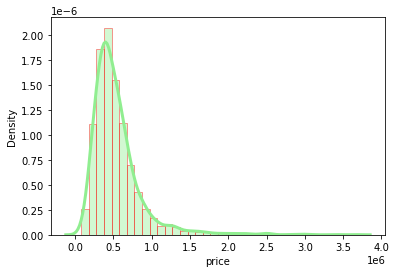

In [12]:
sns.distplot(df1['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 3});

Plot above shows the distribution of dependent variable - house price. Most of values are contained between 0 and 2.0e^6 but there are also values which are higher than 2 millions. These outliers were not deleted because these values are correct and deleting them may causes incorrect conclusions about characterics of Seattle house market.

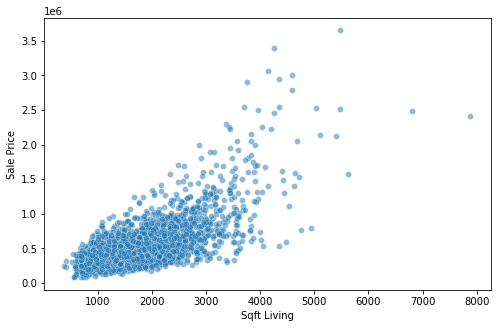

In [13]:
plt.figure(figsize = (8, 5))
sns.scatterplot(df1.sqft_living, df1.price, 
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

There is positive dependence between sale price and living area size. It looks like linear or quasilinear dependence.

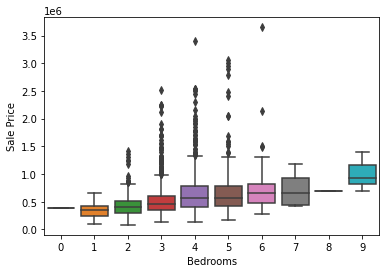

In [14]:
sns.boxplot(x="bedrooms", y="price", data=df1)
plt.xlabel('Bedrooms')
plt.ylabel('Sale Price');

For 3,4,5,6 bedrooms there are many outliers. Also median sale price rises with the number of bedrooms. 

<IPython.core.display.Javascript object>


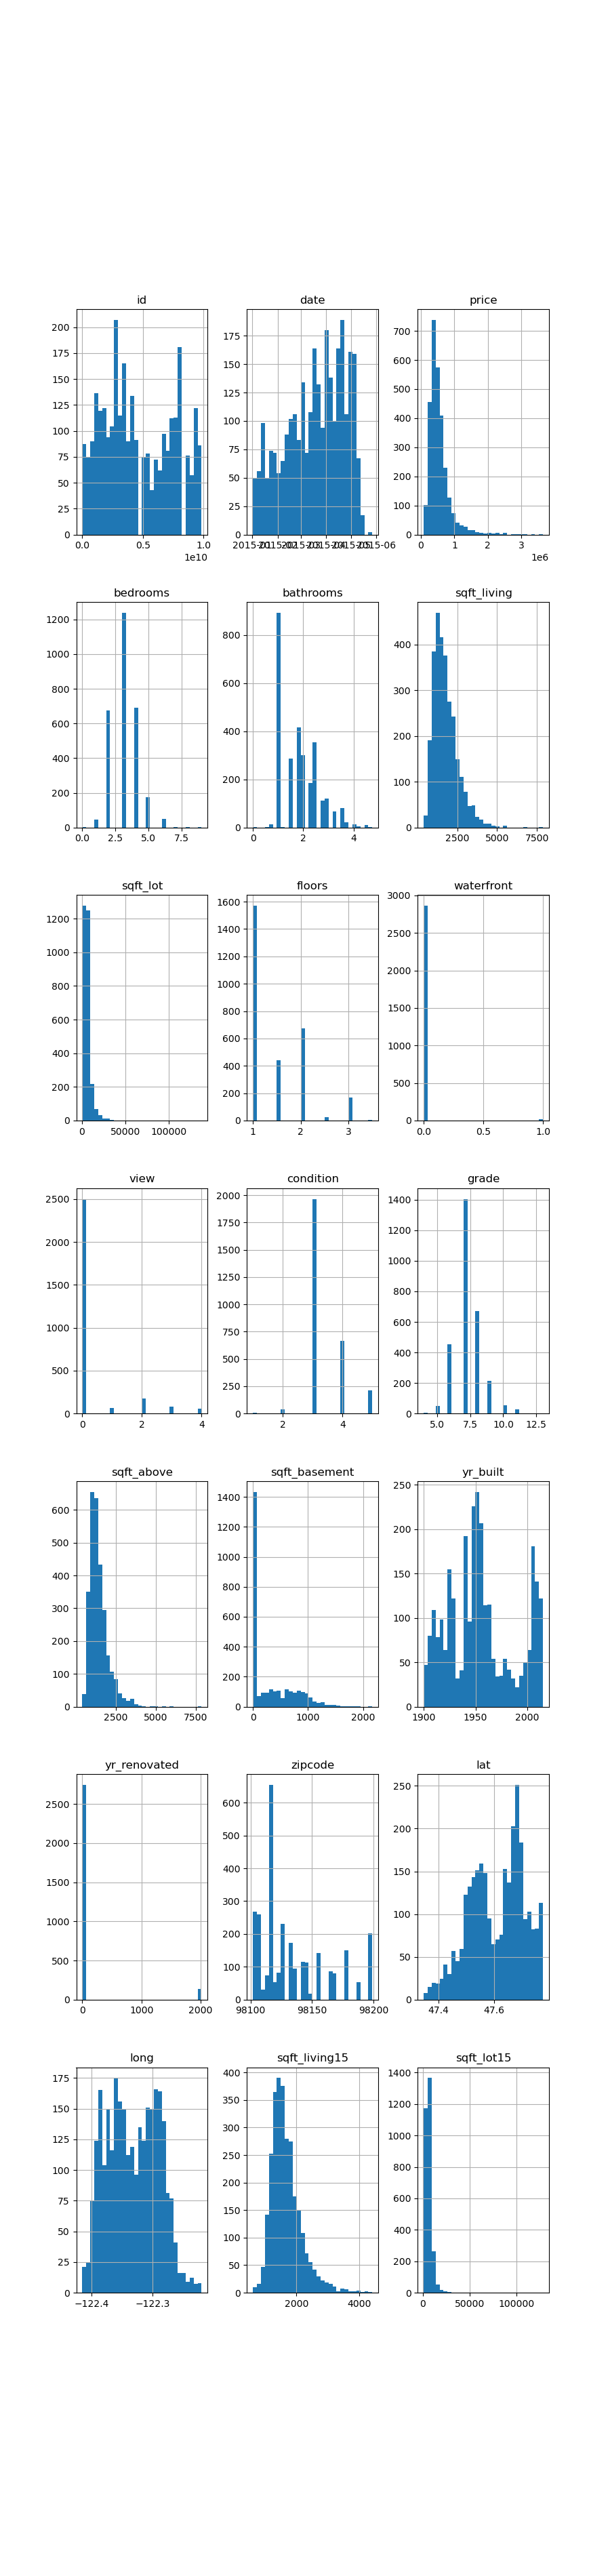

In [37]:
%matplotlib notebook
from itertools import combinations

fig, axes = plt.subplots(len(df1.columns)//3, 3, figsize=(9, 38))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df1.hist(column = df1.columns[i], bins = 30, ax=axis)
        i = i+1

Distribution of every variable was printed not only to acquire more information about variables values but also to known which variables are redundant because of lack of differentiation in values. 'Waterfront' and 'yr_renovated' are variables for which most of observations have the same value.

In [16]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.883000e+03,2.883000e+03,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000
mean,4.622288e+09,5.400074e+05,3.158515,1.855359,1755.314256,6481.031217,1.444676,0.007631,0.308706,3.360042,7.287201,1425.987166,329.327090,1955.585501,96.894554,98134.276101,47.610019,-122.332331,1669.644814,6202.670135
std,2.833980e+09,3.320013e+05,0.990335,0.781006,768.138372,5512.115380,0.581022,0.087036,0.861557,0.643733,1.028430,610.458033,412.000762,32.069493,428.981483,28.213990,0.098057,0.041148,484.291663,4625.360191
min,2.800031e+06,8.100000e+04,0.000000,0.000000,390.000000,572.000000,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98102.000000,47.345900,-122.415000,620.000000,788.000000
25%,2.265750e+09,3.420000e+05,2.000000,1.000000,1200.000000,4000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1020.000000,0.000000,1929.000000,0.000000,98115.000000,47.533300,-122.366000,1340.000000,4013.000000
50%,4.023500e+09,4.610000e+05,3.000000,1.750000,1600.000000,5671.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1290.000000,90.000000,1951.000000,0.000000,98125.000000,47.626500,-122.334000,1580.000000,5665.000000
75%,7.280300e+09,6.350000e+05,4.000000,2.500000,2160.000000,7803.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1660.000000,640.000000,1978.000000,0.000000,98148.000000,47.687600,-122.298000,1890.000000,7800.000000
max,9.842300e+09,3.650000e+06,9.000000,4.750000,7880.000000,137214.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2170.000000,2015.000000,2015.000000,98199.000000,47.777600,-122.220000,4410.000000,128066.000000


In [17]:
df1.groupby('yr_renovated')['id'].nunique()

yr_renovated
0       2741
1945       1
1946       1
1950       1
1960       2
1963       2
1964       1
1965       2
1967       1
1968       1
1969       1
1970       2
1972       2
1975       2
1977       1
1978       2
1979       1
1980       2
1982       1
1983       2
1984       6
1985       1
1986       1
1987       2
1988       1
1989       3
1990       4
1991       2
1992       1
1993       4
1994       5
1995       2
1996       3
1997       2
1998       2
1999       2
2000       6
2001       1
2002       4
2003       6
2004       5
2005       7
2006       1
2007       7
2008       2
2009       3
2010       5
2011       1
2012       1
2013       5
2014      11
2015       6
Name: id, dtype: int64

In [18]:
df1.groupby('waterfront')['id'].nunique()

waterfront
0    2859
1      22
Name: id, dtype: int64

As it was visible on the plots, 'Waterfront' and 'yr_renovated' have little differentiation in values. These variables will not be used in the model.

<IPython.core.display.Javascript object>


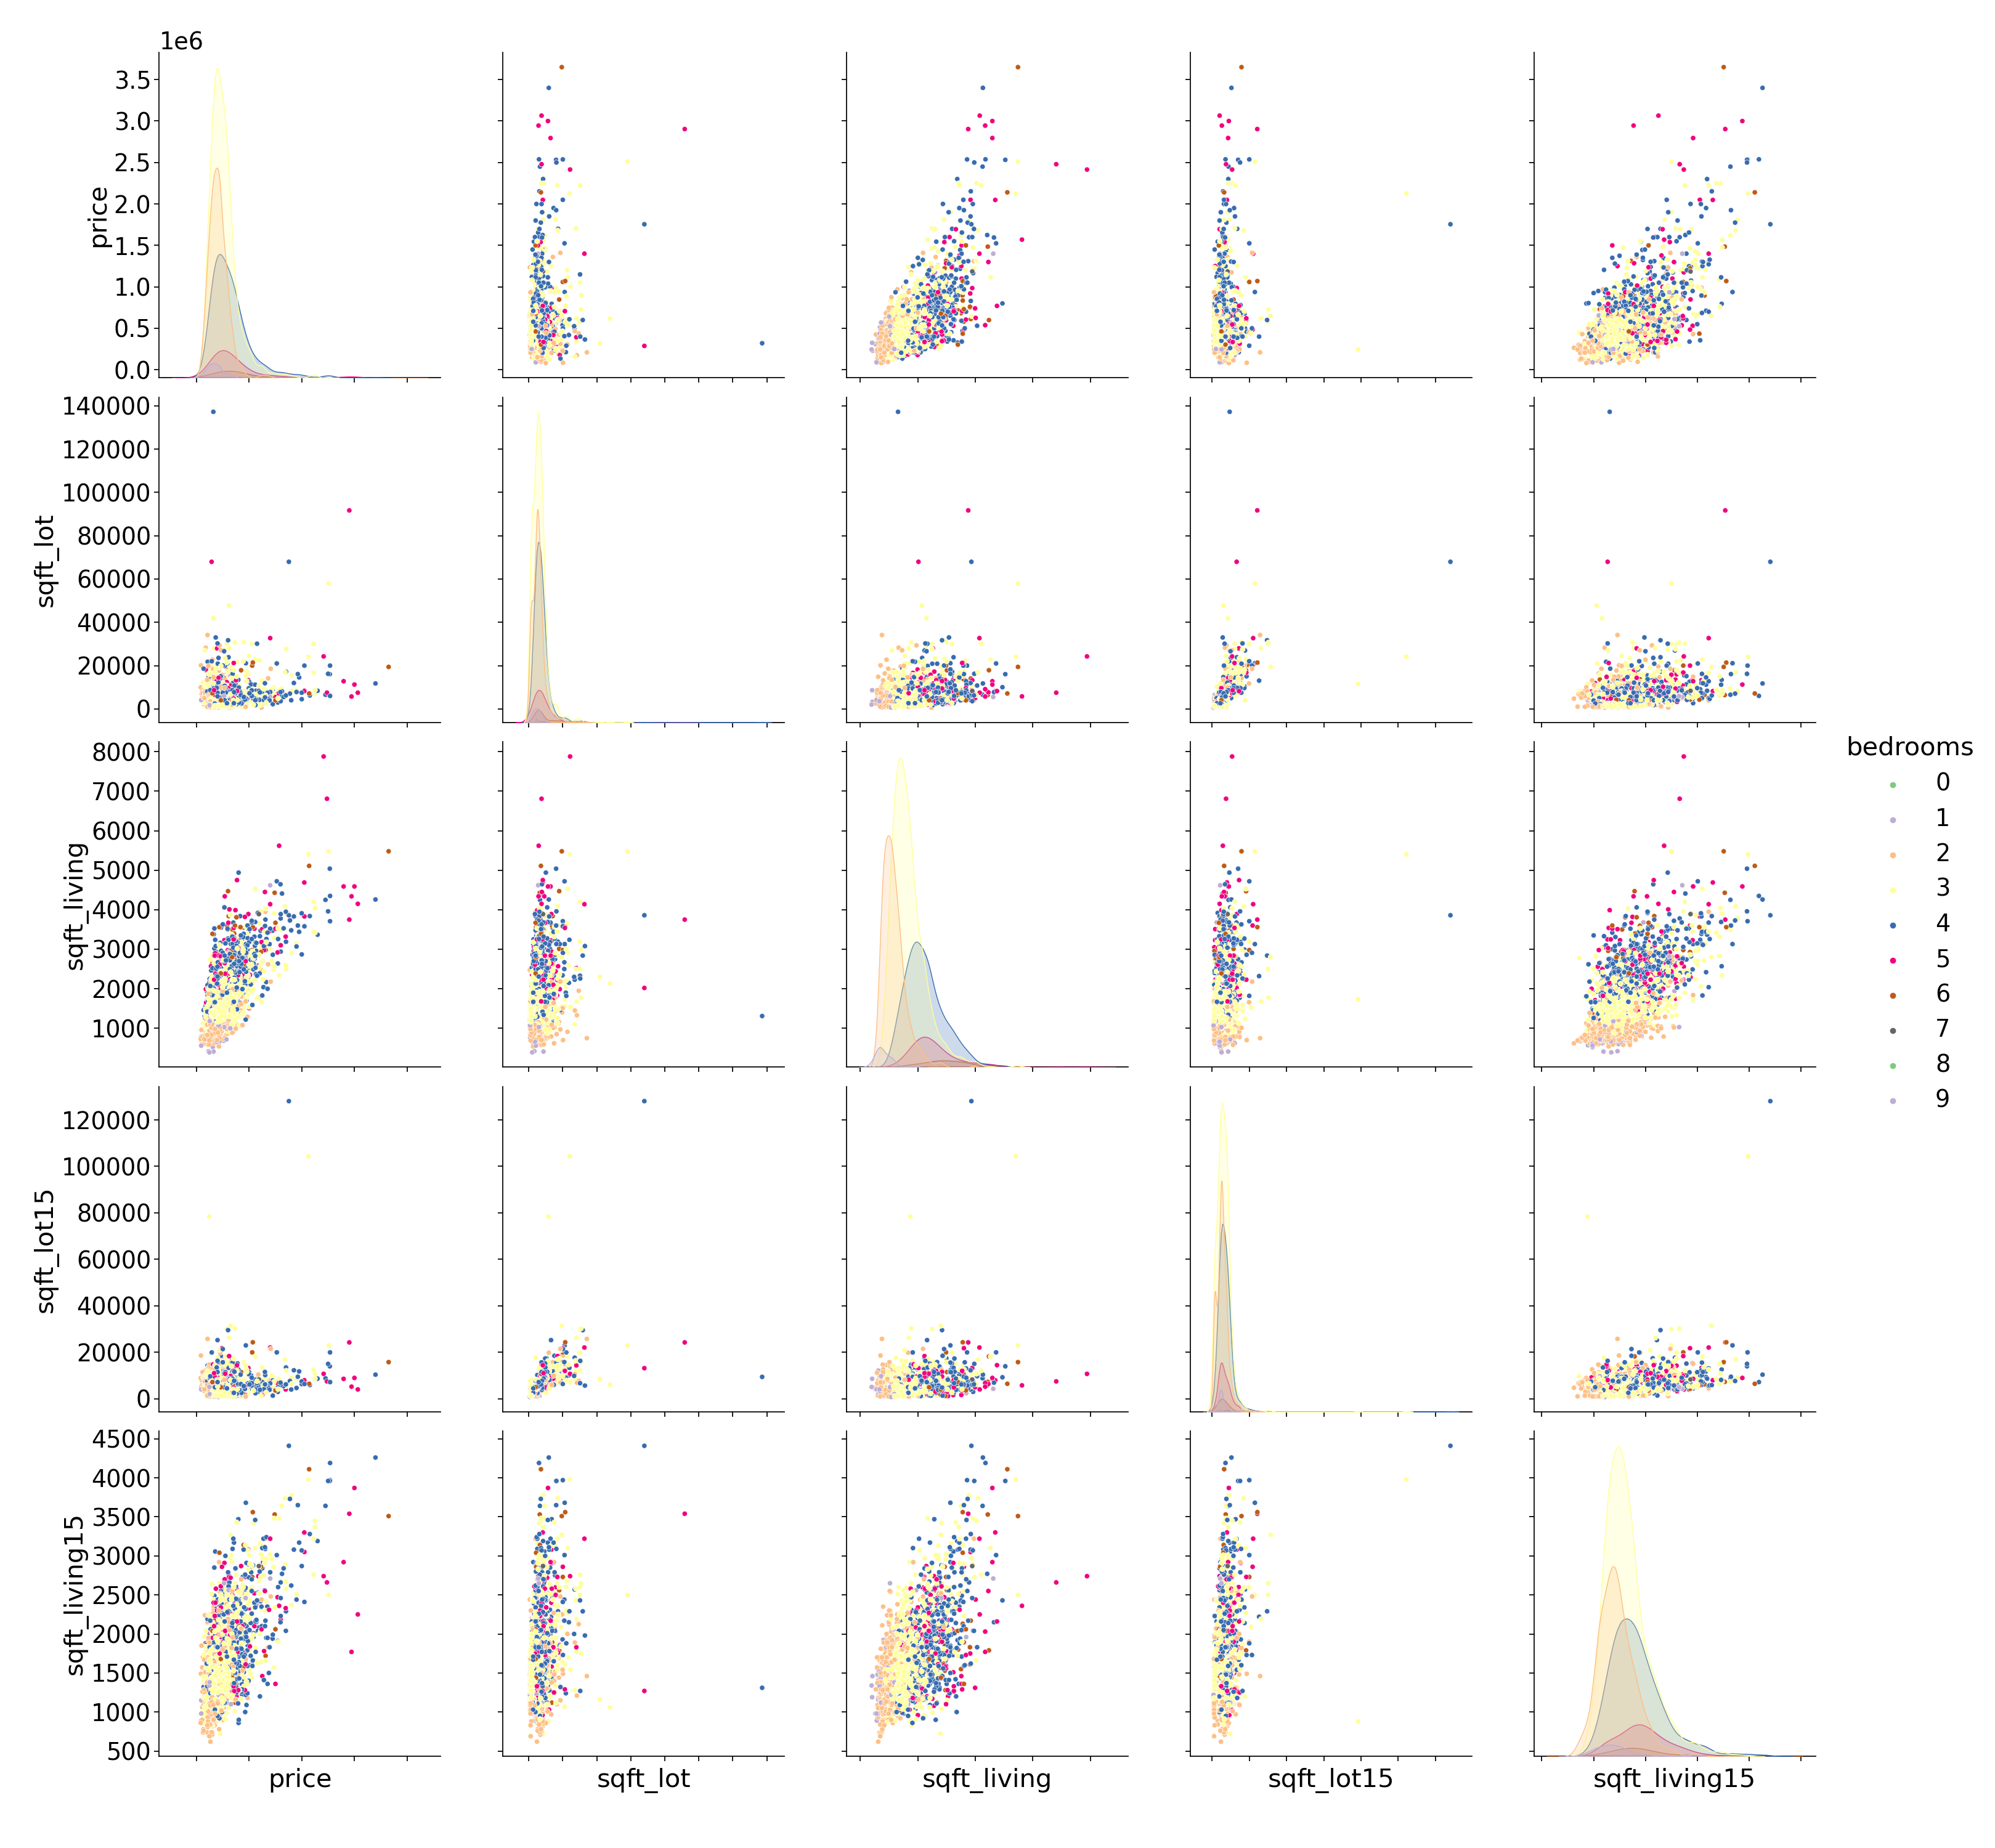

In [36]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df1[['price','sqft_lot','sqft_living','sqft_lot15','sqft_living15','bedrooms']], 
                 hue='bedrooms', palette='Accent',height=6)
g.set(xticklabels=[]);

There is visible dependence not only between price and independent variables but also between independent variables. In addition color of the dot indicate the number of bedrooms. Generally, the higher number of bedrooms, the further the dot is from coordinate system origin but the farthest are these dots which indicate 4 and 5 bedrooms. In the most of the cases above, the relationship between variables is positive.

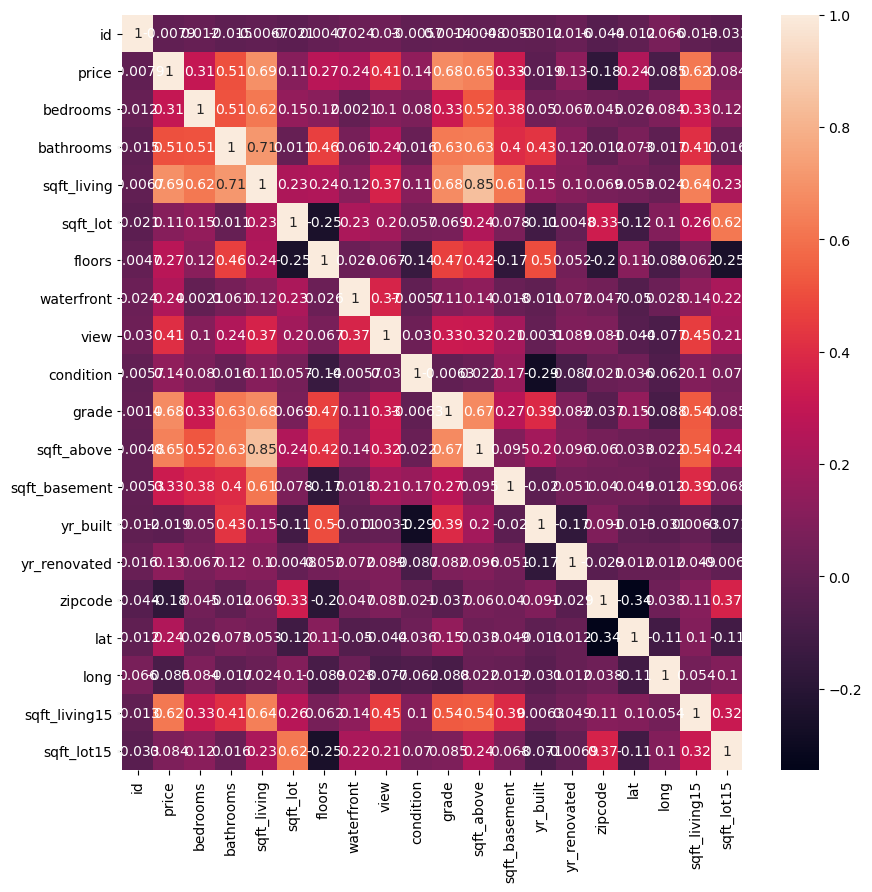

In [20]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=100)
corrMatrix = df1.corr()


sns.heatmap(corrMatrix, annot=True)
plt.show()

Correlation matrix is very helpful if there is need to know which variables are strongly correlated and should not be included in the model. In this case sqft_above is higly correlated wih sqft_living so sqft_above has to be deleted.

In [21]:
levCols = ['bedrooms','bathrooms','floors','view','condition','grade','waterfront','zipcode']
numCols = [ 'sqft_living', 'sqft_lot','sqft_above','sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15','long','lat']

from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos=[]
for var in levCols:
    print("\n", var)
    print("Pearson", stats.pearsonr(df1["price"], df1[var]))
    print("Mutual info", feature_selection.mutual_info_classif(df1[var].values.reshape(-1,1),df1["price"].values))
    minfos.append(feature_selection.mutual_info_classif(df1[var].values.reshape(-1,1),df1["price"].values))
    print("Chi2", feature_selection.chi2(df1[var].values.reshape(-1,1),df1["price"].values))
    print("Anova", feature_selection.f_classif(df1[var].values.reshape(-1,1),df1["price"].values))

imp = list(zip(minfos, levCols))
imp.sort(reverse=True)
imp


 bedrooms
Pearson (0.30696368494824255, 5.8913611135911006e-64)
Mutual info [0.41587927]
Chi2 (array([421.39692873]), array([1.]))
Anova (array([1.35400744]), array([6.7578964e-09]))

 bathrooms
Pearson (0.5068587167404224, 5.0762256228360675e-188)
Mutual info [0.48337273]
Chi2 (array([543.03063793]), array([1.]))
Anova (array([2.04268991]), array([1.42171965e-41]))

 floors
Pearson (0.2666488009903062, 4.003775711035853e-48)
Mutual info [0.93231087]
Chi2 (array([308.20165832]), array([1.]))
Anova (array([1.28378625]), array([1.46078359e-06]))

 view
Pearson (0.40898039224882304, 1.1214571634977042e-116)
Mutual info [0.03594289]
Chi2 (array([4103.60212866]), array([0.]))
Anova (array([2.20915604]), array([9.68317381e-51]))

 condition
Pearson (0.14400231889637127, 7.900181279263605e-15)
Mutual info [0.46417132]
Chi2 (array([148.65403385]), array([1.]))
Anova (array([1.09375296]), array([0.04721805]))

 grade
Pearson (0.6790029725305716, 0.0)
Mutual info [0.62156654]
Chi2 (array([295.1

[(array([0.87363079]), 'floors'),
 (array([0.69120491]), 'grade'),
 (array([0.50037707]), 'condition'),
 (array([0.48263844]), 'bathrooms'),
 (array([0.34487591]), 'bedrooms'),
 (array([0.21245823]), 'zipcode'),
 (array([0.03699667]), 'view'),
 (array([0]), 'waterfront')]

In [22]:
minfos=[]
for var in numCols:
    print(var, " Mutual info", feature_selection.mutual_info_regression(df1[var].astype(float).values.reshape(-1,1),df1["price"].astype(float).values))
    minfos.append(feature_selection.mutual_info_regression(df1[var].astype(float).values.reshape(-1,1),df1["price"].astype(float).values))

imp = list(zip(minfos, numCols))
imp.sort(reverse=True)
imp

sqft_living  Mutual info [0.2971778]
sqft_lot  Mutual info [0.08402644]
sqft_above  Mutual info [0.23870193]
sqft_basement  Mutual info [0.06911553]
yr_built  Mutual info [0.08771311]
yr_renovated  Mutual info [0.01456418]
sqft_living15  Mutual info [0.2047782]
sqft_lot15  Mutual info [0.11890841]
long  Mutual info [0.09258895]
lat  Mutual info [0.33921764]


[(array([0.33743623]), 'lat'),
 (array([0.29467238]), 'sqft_living'),
 (array([0.23995303]), 'sqft_above'),
 (array([0.21448262]), 'sqft_living15'),
 (array([0.11871812]), 'sqft_lot15'),
 (array([0.10067677]), 'long'),
 (array([0.08734064]), 'sqft_lot'),
 (array([0.08485308]), 'yr_built'),
 (array([0.06905858]), 'sqft_basement'),
 (array([0.01852497]), 'yr_renovated')]

In order to choose the right variables, the feature selection algorithms were used. Based on statistics above, columns like view, waterfront, sqft_lot, yr_built, sqft_basement, yr_renovated, long, zipcode will not be used in model.

## Model selection


Data prepared in the previous part has to be adapted to be used in the model. For this purpose few additional steps have to be taken before implementing data into model. After it, the regressions like Linear Regression, Lasso, Ridge, Decision Tree, Random Forest will be used to check which approach is the best for this dilemma.

In [23]:
df_model = df1.drop(['id','date','zipcode','lat','sqft_above','sqft_lot','sqft_lot15','sqft_basement','yr_built','yr_renovated','waterfront','view'],axis=1)   

dummVars = ['bedrooms','bathrooms','floors','condition','grade']

for col in dummVars:
    df_model = df_model.merge(pd.get_dummies(df_model[col], drop_first=True, prefix=col), left_index=True, right_index=True) 
df_model = df_model.drop(['bedrooms','bathrooms','floors','condition','grade'], axis=1)
df_model

,price,sqft_living,long,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_2,condition_3,condition_4,condition_5,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
3,291850.0,1060,-122.315,1650,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,229500.0,1780,-122.337,1780,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,530000.0,1810,-122.394,1360,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7,650000.0,2950,-122.375,2140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
20,450000.0,1250,-122.301,970,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,467000.0,1425,-122.318,1285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8970,429000.0,1490,-122.288,1400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8971,1007500.0,3510,-122.398,2050,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8972,475000.0,1310,-122.409,1330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [24]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['price', 'sqft_living', 'sqft_living15','long']
df_model[num_vars] = scaler.fit_transform(df_model[num_vars])

Redundant variables were deleted, discrete variables were transformed into dummy variables and data were standardized.

In [25]:
from sklearn.model_selection import train_test_split
import random
X_train, X_test, y_train, y_test = train_test_split(df_model, df_model.price, test_size=0.2, random_state=random.randint(0,1000))
print("Train shape:", X_train.shape, "\nTest shape:", X_test.shape)

del X_train['price']
del X_test['price']

Train shape: (2306, 49) 
Test shape: (577, 49)


In [26]:
X_train

,sqft_living,long,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_2,condition_3,condition_4,condition_5,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
404,0.150868,0.323077,0.332454,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6630,0.176235,0.564103,0.240106,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
806,0.130841,0.374359,0.197889,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7356,0.273698,0.589744,0.287599,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5526,0.192256,0.543590,0.184697,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,0.101469,0.256410,0.218997,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3675,0.112150,0.651282,0.234828,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8422,0.427236,0.758974,0.390501,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1165,0.093458,0.394872,0.203166,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [27]:
y_train

404     0.131409
6630    0.186607
806     0.080961
7356    0.202858
5526    0.074811
          ...   
8274    0.104217
3675    0.087139
8422    0.342113
1165    0.169235
2945    0.105492
Name: price, Length: 2306, dtype: float64

Dataset was divided into train (80%) and test (20%) set.

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from time import perf_counter

In [29]:
pd.options.display.float_format = '{:.4f}'.format

models = {
    "LinearRegression":{"model":LinearRegression() },
    "Lasso":{"model":Lasso() },
    "Ridge":{"model":Ridge() },
    "DecisionTreeRegressor":{"model":DecisionTreeRegressor() },
    "RandomForestRegressor":{"model":RandomForestRegressor() }
}

models_result = []
scorings = ['r2','neg_root_mean_squared_error','neg_mean_absolute_error']
k = 4
print(f"For {k}-fold CV:\n")
for name, m in models.items():

    model = m['model']
    print(f"{name:3}:")
    for scoring in scorings:
        result = cross_validate(model, X_train,y_train, cv = k, scoring=scoring)
        
        score = result['test_score']
        mean_score=sum(score)/len(score)
        mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 4)

        m['mean_score'] = mean_score
        m['Training time (sec)'] = mean_fit_time
        m['scoring'] = scoring
        
        lst = [name,m['scoring'], m['mean_score'],m['Training time (sec)']]
        models_result.append(lst)
        
        print(f" Scoring: {scoring} \n Scores: {score} \n Mean_{scoring}: {mean_score} \n Mean training time {mean_fit_time} sec\n")      

For 4-fold CV:

LinearRegression:
 Scoring: r2 
 Scores: [0.6568585  0.69756774 0.68227758 0.6534952 ] 
 Mean_r2: 0.6725497538410796 
 Mean training time 0.0085 sec

 Scoring: neg_root_mean_squared_error 
 Scores: [-0.05630764 -0.05486755 -0.0542798  -0.05172989] 
 Mean_neg_root_mean_squared_error: -0.0542962234233082 
 Mean training time 0.008 sec

 Scoring: neg_mean_absolute_error 
 Scores: [-0.03893273 -0.03820654 -0.03727903 -0.03600228] 
 Mean_neg_mean_absolute_error: -0.03760514741467106 
 Mean training time 0.0088 sec

Lasso:
 Scoring: r2 
 Scores: [-6.60086524e-05 -2.13063245e-03 -9.76532500e-05 -2.55365142e-03] 
 Mean_r2: -0.0012119864432443284 
 Mean training time 0.012 sec

 Scoring: neg_root_mean_squared_error 
 Scores: [-0.09612693 -0.09987659 -0.09630205 -0.08799151] 
 Mean_neg_root_mean_squared_error: -0.09507426955715928 
 Mean training time 0.0132 sec

 Scoring: neg_mean_absolute_error 
 Scores: [-0.06255941 -0.06412025 -0.06209101 -0.05923513] 
 Mean_neg_mean_absolute

Dataset is ready to use in selected models: Linear Regression, Lasso, Ridge, Decision Tree, Random Forest. For each model to get the mean validation accuracy and the mean training time, the 4-fold cross validation was implemented. The following scorings were used: R2, neg_root_mean_squared_error, neg_mean_absolute_error. According to the documentation https://scikit-learn.org/stable/modules/model_evaluation.html, all scorer objects follow the convention that higher return values are better than lower return values.

In [30]:
df_results = pd.DataFrame(models_result, 
                          columns = ['Model','Scoring','Mean score','Training time (sec)'])
df_results.sort_values(by=['Scoring'], ascending=True, inplace=True)

df_results

,Model,Scoring,Mean score,Training time (sec)
2,LinearRegression,neg_mean_absolute_error,-0.0376,0.0088
5,Lasso,neg_mean_absolute_error,-0.0620,0.0346
8,Ridge,neg_mean_absolute_error,-0.0376,0.0207
11,DecisionTreeRegressor,neg_mean_absolute_error,-0.0513,0.0290
14,RandomForestRegressor,neg_mean_absolute_error,-0.0369,1.0865
1,LinearRegression,neg_root_mean_squared_error,-0.0543,0.0080
4,Lasso,neg_root_mean_squared_error,-0.0951,0.0132
7,Ridge,neg_root_mean_squared_error,-0.0539,0.0167
10,DecisionTreeRegressor,neg_root_mean_squared_error,-0.0761,0.0372
13,RandomForestRegressor,neg_root_mean_squared_error,-0.0545,1.2372


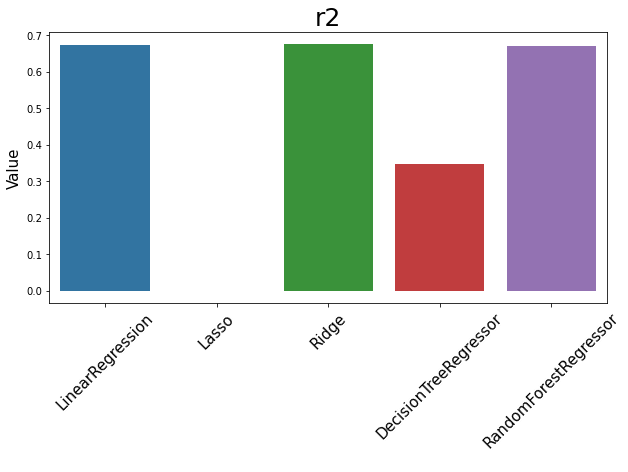

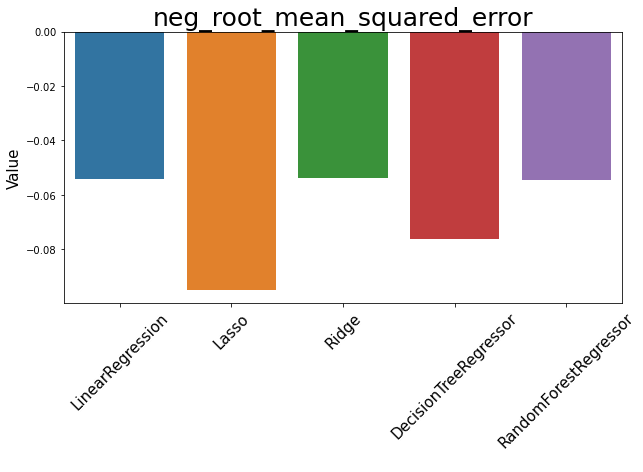

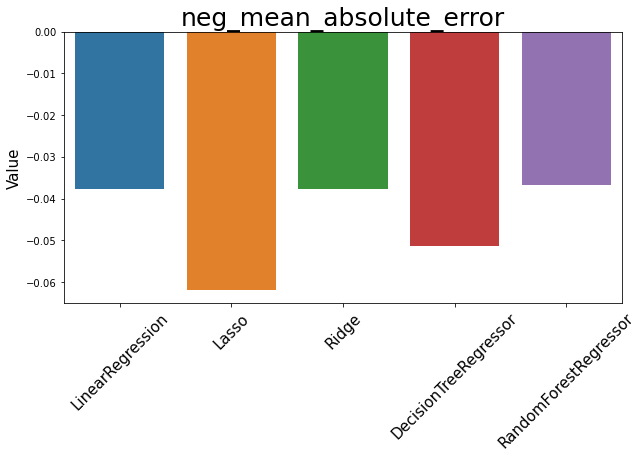

In [31]:
for scoring in scorings:
    plt.figure(figsize = (10,5))
    sns.barplot(x = 'Model', y = 'Mean score', data = df_results[df_results['Scoring']==scoring])
    plt.title(scoring, fontsize = 25)
    plt.xlabel('Model',color='white')
    plt.ylabel('Value',fontsize=15)
    plt.xticks(rotation=45, fontsize=15)
    plt.show()

In [32]:
# The highest mean scores
df_results[df_results.groupby('Scoring')['Mean score'].transform('max') == df_results['Mean score']]

,Model,Scoring,Mean score,Training time (sec)
14,RandomForestRegressor,neg_mean_absolute_error,-0.0369,1.0865
7,Ridge,neg_root_mean_squared_error,-0.0539,0.0167
6,Ridge,r2,0.6765,0.0168


In [33]:
# The fastest training time
df_results[df_results.groupby('Scoring')['Training time (sec)'].transform('min') == df_results['Training time (sec)']]

,Model,Scoring,Mean score,Training time (sec)
2,LinearRegression,neg_mean_absolute_error,-0.0376,0.0088
1,LinearRegression,neg_root_mean_squared_error,-0.0543,0.0080
0,LinearRegression,r2,0.6725,0.0085


In [34]:
# The slowest training time
df_results[df_results.groupby('Scoring')['Training time (sec)'].transform('max') == df_results['Training time (sec)']]

,Model,Scoring,Mean score,Training time (sec)
14,RandomForestRegressor,neg_mean_absolute_error,-0.0369,1.0865
13,RandomForestRegressor,neg_root_mean_squared_error,-0.0545,1.2372
12,RandomForestRegressor,r2,0.6698,1.3912


The exact results were described in the table above and shown on the plots. It is hard to point one best model. Random Forest Regression has high mean scores but also has the highest training times while Linear Regression and Ridge Regression have similar mean scores and much lower training times. The choice is dependent of the situation - if there is need to have the most precisely results and training time is not a problem then Random Forest Regressor is recomendend, if dataset is huge and computation time matters then Ridge or Linear Regression are recommendend. 

The worst regression for this case is Lasso. Not only the value of errors has the highest but also R2 is below the zero. According to https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative R2 is negative because the chosen model fits worse than a horizontal line (R2 compares the fit of the chosen model with that of a horizontal straight line). Decision Tree Regression is also not properly for this case. It has better results than Lasso but not enough to rival with Linear, Ridge or Random Forest Regression.

## Conclusions

The purpose of this project was achieved. With exploratory data analysis data was apprioriate prepared. By feature selection based on mutual information independent variables for the model. were chosen Few steps like creating dummy variables, standardizing the data and spliting dataset into train and test set were necessary before implementing data into model. After these steps, following models were checked:
- Linear Regression
- Lasso
- Ridge
- Decision Tree
- Random Forest

To prepare the most appriopriate results, 4-fold cross validation was used for each model, then metrics like R2, neg_root_mean_squared_error, neg_mean_absolute_error were checked. The best results were for Random Forest, Linear Regression and Rigde Regression. By Random Forest Regression the high R2 and low errors were obtained but also the highest training time. For Ridge or Linear Regression metrics value were similar but the training time was the lowest. This problem should not be analyzed by using Lasso or Decision Tree regression, because especially Lasso regression have much worse results than the rest.